In [3]:
# 로지스틱회귀 추가학습 예제
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("./dataset/LogisticRegressionData.csv")
dataset.head()

,hour,pass
0,0.5,0
1,1.2,0
2,1.8,0
3,2.4,0
4,2.6,0


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [6]:
classifier.predict([[6]])

array([1], dtype=int64)

In [7]:
classifier.predict_proba([[6]])  # predict_proba : 각 클래스에 속할 확률(분류에 사용)

array([[0.141483, 0.858517]])

In [8]:
classifier.predict([[4]])

array([0], dtype=int64)

In [9]:
classifier.predict_proba([[4]])

array([[0.62497682, 0.37502318]])

In [10]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1], dtype=int64)

In [11]:
y_test

array([1, 0, 1, 0], dtype=int64)

In [12]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [13]:
# 정확도 반환
classifier.score(X_test, y_test)

0.75

In [14]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

C:\Users\human-16\AppData\Local\Temp\ipykernel_6664\3009068081.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [15]:
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
p

array([[0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840509,
        0.97175925, 0.97476661, 0.97746114, 0.97

In [16]:
X_range.shape

(95,)

In [17]:
p = p.reshape(-1)
p.shape

(95,)

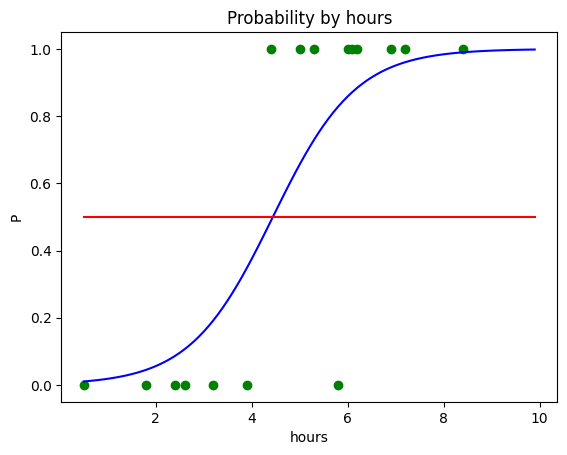

In [23]:
plt.scatter(X_train, y_train, color="green")
plt.plot(X_range, p, color="blue")
plt.plot(
    X_range, np.full(len(X_range), 0.5), color="red"
)  # y축에 일정한 값인 0.5를 유지하는 직선
plt.title("Probability by hours")
plt.xlabel("hours")
plt.ylabel("P")
plt.show()

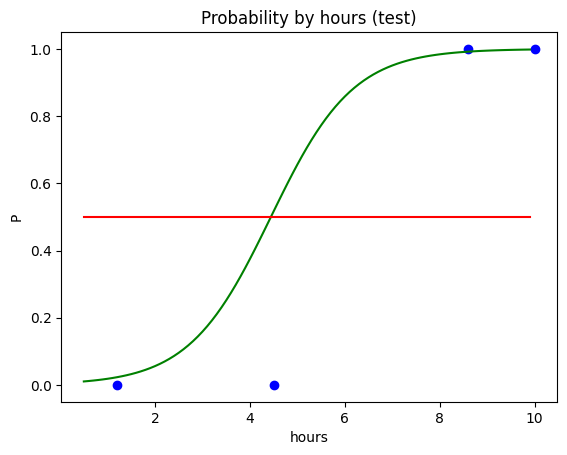

In [19]:
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_range, p, color="green")
plt.plot(
    X_range, np.full(len(X_range), 0.5), color="red"
)  # y축에 일정한 값인 0.5를 유지하는 직선
plt.title("Probability by hours (test)")
plt.xlabel("hours")
plt.ylabel("P")
plt.show()

In [24]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [25]:
# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

In [26]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
# 의사결정 나무 모델 생성 및 학습
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# 예측
y_pred = clf.predict(X_test)

In [29]:
# 정확도 평가
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 1.0


In [30]:
# 나이브 베이즈(Naive Bayes) : 텍스트 분류 문제에서 매우 효과적

# 스팸메일 분류 예제
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [38]:
# 1. 데이터 불러오기
data = pd.read_csv("./dataset/spam.csv", encoding="ISO-8859-1")
data = data[["v1", "v2"]]  # 필요한 열만 선택
data.columns = ["label", "text"]  # 열 이름 변경

In [39]:
# 2. 데이터 전처리
data["label"] = data["label"].map({"ham": 0, "spam": 1})  # 레이블을 숫자로 변환
data.dropna(inplace=True)  # 결측치 제거

In [40]:
# 3. 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    data["text"], data["label"], test_size=0.2, random_state=42
)

In [41]:
# 4. TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [42]:
# 5. 모델 학습
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [43]:
# 6. 예측 및 평가
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [44]:
# 7. 샘플 테스트
sample_text = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now!",
    "Congratulations! You've been selected to receive a free iPhone 15. Click to claim now!",
    "Hey, are we meeting for lunch tomorrow?",
]
sample_tfidf = vectorizer.transform(sample_text)
predictions = model.predict(sample_tfidf)
for text, label in zip(sample_text, predictions):
    print(f"Text: {text} => {'Spam' if label == 1 else 'Ham'}")

Text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now! => Spam
Text: Congratulations! You've been selected to receive a free iPhone 15. Click to claim now! => Spam
Text: Hey, are we meeting for lunch tomorrow? => Ham


In [45]:
# SVM(support vector machine)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [46]:
# 1. 데이터 불러오기
data = pd.read_csv('./dataset/spam.csv', encoding='ISO=8859-1')
data = data[['v1', 'v2']] # 필요한 열만 선택
data.columns = ['label', 'text'] # 열 이름 변경


In [47]:
# 2. 데이터 전처리
data['label'] = data['label'].map({'ham':0, 'spam':1}) # 레이블을 숫자로 변환한다
data.dropna(inplace=True) # 결측치 제거

In [48]:
# 3. 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [49]:
# 4. TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [50]:
# 5. SVM 모델 학습
model = SVC(kernel='linear', random_state=42) # SVM 모델 생성 (linear kernel)
model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [51]:
# 6. 예측 및 평가
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.979372197309417

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [52]:
# 7. 샘플 테스트
sample_text = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now!",
    "Congratulations! You've been selected to receive a free iPhone 15. Click to claim now!",
    "Hey, are we meeting for lunch tomorrow?"
]
sample_tfidf = vectorizer.transform(sample_text)
predictions = model.predict(sample_tfidf)
for text, label in zip(sample_text, predictions):
    print(f"Text: {text} => {'Spam' if label == 1 else 'Ham'}")

Text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now! => Spam
Text: Congratulations! You've been selected to receive a free iPhone 15. Click to claim now! => Spam
Text: Hey, are we meeting for lunch tomorrow? => Ham


In [53]:
# KNN(K 최근접 이웃)
# KNN(K 최근접 이웃) 분류 예제
# iris 데이터셋셋 : 꽃받침(Sepal)과 꽃잎(Petal)의 길이 너비로 품종을 분류
# 필요한 라이브러리 임포트
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [54]:
# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

In [55]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [56]:
# 데이터 표준화 (KNN은 거리 기반 알고리즘이므로 표준화 필요)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=3)  # k=3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
# 테스트 데이터 예측
y_pred = knn.predict(X_test)

In [59]:
# 모델 성능 평가
print("모델 성능 평가:")
print("정확도:", accuracy_score(y_test, y_pred))
print(
    "\n분류 보고서:\n",
    classification_report(y_test, y_pred, target_names=iris.target_names),
)

모델 성능 평가:
정확도: 1.0

분류 보고서:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [60]:
# 새로운 데이터에 대한 예측
new_samples = [
    [5.1, 3.5, 1.4, 0.2],  # Setosa
    [6.2, 3.4, 5.4, 2.3],  # Virginica
    [5.9, 3.0, 4.2, 1.5],  # Versicolor
]

new_samples = scaler.transform(new_samples)  # 표준화
predictions = knn.predict(new_samples)

In [61]:
print("\n새로운 데이터에 대한 예측 결과:")
for i, pred in enumerate(predictions):
    print(f"샘플 {i+1}: {iris.target_names[pred]}")


새로운 데이터에 대한 예측 결과:
샘플 1: setosa
샘플 2: virginica
샘플 3: versicolor


In [62]:
# 성능지표 분석
# MSE(Mean Squared Error, 평균제곱오차)

# 실제값과 예측값 정의
actual_values = [3, -0.5, 2, 7]  # 실제값 리스트
predicted_values = [2.5, 0, 2, 8]  # 예측값 리스트

# MSE 계산
squared_errors = [
    (a - p) ** 2 for a, p in zip(actual_values, predicted_values)
]  # 각 오차를 제곱
mse = sum(squared_errors) / len(squared_errors)  # 제곱 오차의 평균

# 결과 출력
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.375


In [63]:
# RMSE(Root Mean Squared Error, 평균제곱근오차)

# 실제값과 예측값 정의
actual_values = [3, -0.5, 2, 7]  # 실제값 리스트
predicted_values = [2.5, 0, 2, 8]  # 예측값 리스트

# RMSE 계산
squared_errors = [
    (a - p) ** 2 for a, p in zip(actual_values, predicted_values)
]  # 각 오차를 제곱
mse = sum(squared_errors) / len(squared_errors)  # MSE 계산
rmse = mse**0.5  # MSE의 제곱근을 계산하여 RMSE를 얻음

# 결과 출력
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.6123724356957945


In [64]:
# MAE(Mean Absolute Error, 평균절대오차)

# 실제값과 예측값 정의
actual_values = [3, -0.5, 2, 7]  # 실제값 리스트
predicted_values = [2.5, 0, 2, 8]  # 예측값 리스트

# MAE 계산
absolute_errors = [
    abs(a - p) for a, p in zip(actual_values, predicted_values)
]  # 각 오차의 절대값
mae = sum(absolute_errors) / len(absolute_errors)  # 절대 오차의 평균

# 결과 출력
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.5


In [65]:
# Accuracy(정확도)

# 실제값과 예측값 정의
actual_values = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # 실제값 리스트 (0 또는 1)
predicted_values = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]  # 예측값 리스트 (0 또는 1)

# Accuracy 계산
correct_predictions = sum(
    [1 for a, p in zip(actual_values, predicted_values) if a == p]
)  # 정확히 예측한 개수
accuracy = correct_predictions / len(actual_values)  # 전체 데이터 중 정확히 예측한 비율

# 결과 출력
print("Accuracy:", accuracy)

Accuracy: 0.8


In [66]:
# 기타 예제

import numpy as np

# 예측 값
y_pred = np.array([1.2, 0.7, 2.5])
# 실제 값
y_true = np.array([1.0, 0.5, 2.5])


# MSE 계산
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


loss = mse_loss(y_true, y_pred)
print("MSE Loss:", loss)

MSE Loss: 0.026666666666666655
